In [1]:
from datetime import date
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import rcParams
import seaborn as sns
import random
import functions.jtsfx as jts
from IPython.display import Markdown

In [2]:
BACKGROUND_D = "#1B1F28"
BACKGROUND_L = "#232732"
ORANGE =       "#DDAD79"
GREEN  =       "#B8CB9A"

REED_PALETTE_DICT = {
   'Red'    :'tomato', 
   'Blue'   :'cornflowerblue', 
   'Purple' :'mediumpurple', 
   "Pink"   :'pink', 
   'Emperor':'orange', 
   'Berry'  :'orchid', 
   'Mint'   :'palegreen'
}

rcParams['axes.facecolor']    = BACKGROUND_L
rcParams['figure.facecolor']  = BACKGROUND_D
rcParams['axes.labelcolor']   = GREEN
rcParams['axes.titlecolor']   = 'white'
rcParams['axes.titleweight']  = "bold"
rcParams['axes.edgecolor']    = 'white'
rcParams['xtick.labelcolor']  = 'white'
rcParams['ytick.labelcolor']  = 'white'

In [3]:
class Reed :
   
   colors = {
      "R" : "Red",
      "B" : "Blue",
      "PU" : "Purple",
      "PI" : "Pink",
      "EMP" : "Emperor",
      "BER" : "Berry",
      "MIN" : "Mint"
   }
   staples = {
      "EB" : "E-Brass",
      "OB" : "O-Brass",
      "HC" : "Hard Cork",
      "SC" : "Soft Cork"
   }
   
   def __init__ (self,      color , staple,    len_init_mm,   year,mo,day):
      """ 
      ======================================================
      INPUT
         >>> color      from :
                           "R" Red  "B" Blue "PU" Purple
                           "PI" Pink    "HAL" Halloween
                           "BER" Berry  "MIN" Mint
         >>> staple     from :
                           "OB" O-Brass   "EB" E-Brass
                           "SC" Soft Cork "HC" Hard Cork
         >>> initial Len      float
         >>> date    --> day, month, year
         
      ======================================================
      """
      self.color   = Reed.colors[color]
      self.staple   = Reed.staples[staple]

      self.datemade     =  date(year,mo,day)   
      self.lenInitial   =  len_init_mm
      self.pitchscores  =  []
      self.respscores   =  []
      self.resoscores   =  []
      
      self.isAlive = True
      
   @property
   def pitch (self):
      return sum(self.pitchscores)/len(self.pitchscores)
   @property
   def response (self):
      return sum(self.respscores)/len(self.respscores)
   @property
   def resonance (self):
      return sum(self.resoscores)/len(self.resoscores)
   @property
   def lifespan (self):
      if self.isAlive == True:
         return (date.today() - self.datemade).days
      
   def __repr__ (self):
      c = self.color
      li = self.lenInitial
      d = f'{self.datemade.month}/{self.datemade.day}'
      return f'[[ REED {d} | {c} | ({li}mm) ]]'
   
   def rec (self, pitch, resp, reso):
      self.pitchscores.append(pitch)
      self.respscores.append(resp)
      self.resoscores.append(reso)
      scores = [ round(sum(x) / len(x),1) for x in [self.pitchscores, self.respscores, self.resoscores]]
      return scores
   
   @property
   def asdict (self):
      return {
         "name" : f'Reed {self.datemade.month}/{self.datemade.day}',
         "color" : self.color ,
         "len_init" : self.lenInitial,
         "date made" : self.datemade,
         "life" : self.lifespan
      }
   
class ReedCase :
   def __init__ (self, caseName):
      self.name = caseName
      self.reeds = []
   
   @property
   def df (self):
      return pd.DataFrame([r.asdict for r in self.reeds])
      
   def newReed (self,      color , staple,    len_init_mm,   year,mo,day):
      """ ======================================================
      INPUT
         >>> color      from :
                           "R" Red      "B" Blue         "PU" Purple
                           "PI" Pink    "HAL" Halloween
                           "BER" Berry  "MIN" Mint
         >>> staple     from :
                           "OB" O-Brass     "EB" E-Brass
                           "SC" Soft Cork   "HC" Hard Cork
         >>> initial Len      float
         >>> date    -->      day, month, year
         
      ======================================================"""
      reed = Reed (color, staple, len_init_mm, year,mo,day)
      self.reeds.append(reed)
      return reed
   
   @property
   def initLenAverage (self):
      return round(self.df.len_init.mean(),3)

In [4]:
def makeRandomReed (case):
   case.newReed (
      random.choice(list(Reed.colors.keys())),
      random.choice(list(Reed.staples.keys())),
      random.randint(697,730) / 10,
      2022,
      random.randint(1,5),
      random.randint(1,28)
   )

In [5]:
JTS = ReedCase("Josh's Reeds")

JTS.newReed("PI", "OB",    72.3,    2022,5,4)
JTS.newReed("MIN","SC",    72,      2022,5,4)
JTS.newReed("B",  "EB",    71.8,    2022,5,7)
JTS.newReed("BER","EB",    71.1,    2022,5,15)
for x in range(40):
   makeRandomReed(JTS)

JTS.df.describe().style.format("{:.3g}")

,len_init,life
count,44,44
mean,71.6,65.5
std,0.915,43.6
min,69.8,5
25%,71,24
50%,71.7,67
75%,72.3,98.8
max,73,141


In [6]:
md = f"""
#### INITIAL LENGTH (*mean*)= **{JTS.initLenAverage} mm**

*n = {len(JTS.df)} reeds*
"""
Markdown (md)


#### INITIAL LENGTH (*mean*)= **71.593 mm**

*n = 44 reeds*


In [7]:
JTS.df.sort_values('date made')
JTS.df['date made'] = JTS.df['date made'].astype('datetime64')

Text(0.5, 0, '$Length_{initial} ~ (mm)$')

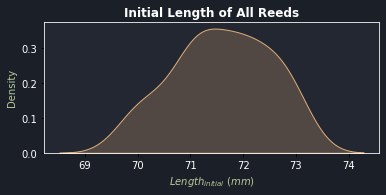

In [8]:
jts.snsFigSize(6,2.4)
sns.kdeplot (x="len_init",data=JTS.df,shade=True, color= ORANGE)
plt.title("Initial Length of All Reeds")
plt.xlabel("$Length_{initial} ~ (mm)$")

Text(0.5, 0, '$days$')

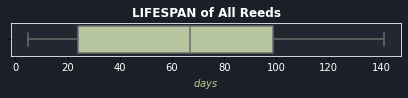

In [9]:
jts.snsFigSize(7,0.6)
sns.boxplot (x="life",data=JTS.df,color=GREEN)
plt.title("LIFESPAN of All Reeds")
plt.xlabel("$days$")

In [10]:
df_dummies = pd.get_dummies(JTS.df['color'])
del df_dummies[df_dummies.columns[-1]]
df_new = pd.concat([JTS.df, df_dummies], axis=1)
del df_new['color']
corel = df_new.corr().iloc[2:,0:2]
corel

,len_init,life
Berry,0.076069,-0.204110
Blue,-0.231400,0.107341
Emperor,0.238472,0.153897
Mint,0.177264,-0.009337
Pink,-0.085885,-0.007835
Purple,-0.216750,0.075075


Text(0.5, 1.0, 'Correlations with Color')

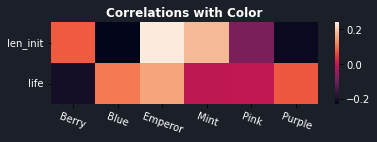

In [11]:
jts.snsFigSize(6,1.5)
ax = sns.heatmap(corel.T)
ax.set_xticklabels(ax.get_xticklabels() ,rotation=-20)
ax.set_yticklabels(ax.get_yticklabels() ,rotation=0)
plt.title("Correlations with Color")

In [12]:
len_vs_color = [ (round(JTS.df[JTS.df['color'] == x]['len_init'].mean(),2), x) for x in list(Reed.colors.values())]
df_len_color = pd.DataFrame(len_vs_color,columns=["length_mm","color"])
df_len_color = df_len_color.sort_values("length_mm")
df_len_color

,length_mm,color
1,71.07,Blue
2,71.10,Purple
3,71.45,Pink
5,71.72,Berry
0,71.97,Red
6,72.10,Mint
4,72.28,Emperor


Text(0, 0.5, '$len_{init} ~(mm)$')

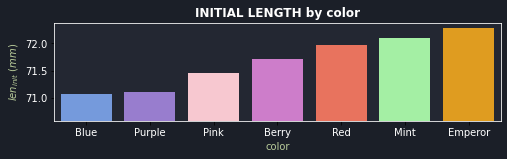

In [13]:
jts.snsFigSize(8,1.8)
fig, ax = plt.subplots()

MAXVIEW = df_len_color.length_mm.max() + 0.1
MINVIEW = df_len_color.length_mm.min() - 0.5

ax.set_ylim(MINVIEW, MAXVIEW)

plt.title("INITIAL LENGTH by color")

palette = [REED_PALETTE_DICT[color] for color in df_len_color.color]

sns.barplot(y='length_mm',x='color',data=df_len_color, palette= palette)
plt.ylabel("$len_{init} ~(mm)$")